# Email Spam - ML

## Steps
- Import Libraries
- Data Preprocessing
- Feature Encoding
- Feature Selection
- Model Training

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [2]:
data=pd.read_csv('files/train/raw/train.csv')

In [3]:
data

,v1,v2
0,ham,Baaaaaaaabe! Wake up ! I miss you ! I crave yo...
1,ham,Tired. I haven't slept well the past few nights.
2,spam,3. You have received your mobile content. Enjoy
3,spam,Double Mins & 1000 txts on Orange tariffs. Lat...
4,ham,Hey... Very inconvenient for your sis a not huh?
...,...,...
3895,ham,Hey what's up charles sorry about the late reply.
3896,ham,Oh oh... Den muz change plan liao... Go back h...
3897,ham,Huh i cant thk of more oredi how many pages do...
3898,ham,I have printed it oh. So &lt;#&gt; come upst...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      3900 non-null   object
 1   v2      3900 non-null   object
dtypes: object(2)
memory usage: 61.1+ KB


In [5]:
data.nunique()

v1       2
v2    3688
dtype: int64

In [6]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
data.isna().sum()

v1    0
v2    0
dtype: int64

In [8]:
data.duplicated().sum()

212

In [9]:
data.drop_duplicates()

,v1,v2
0,ham,Baaaaaaaabe! Wake up ! I miss you ! I crave yo...
1,ham,Tired. I haven't slept well the past few nights.
2,spam,3. You have received your mobile content. Enjoy
3,spam,Double Mins & 1000 txts on Orange tariffs. Lat...
4,ham,Hey... Very inconvenient for your sis a not huh?
...,...,...
3895,ham,Hey what's up charles sorry about the late reply.
3896,ham,Oh oh... Den muz change plan liao... Go back h...
3897,ham,Huh i cant thk of more oredi how many pages do...
3898,ham,I have printed it oh. So &lt;#&gt; come upst...


In [10]:
data.describe()

,v1,v2
count,3900,3900
unique,2,3688
top,ham,"Sorry, I'll call later"
freq,3371,18


## Feature Engineering

In [11]:
df=data.copy()
x=df['v2'].copy()
y=df['v1'].copy()

## Splitting Datas

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True,random_state=123)

In [13]:
x_train.to_csv('files/train/raw/x_train.csv',index=False)
y_train.to_csv('files/train/raw/y_train.csv',index=False)

x_test.to_csv('files/evaluate/raw/x_test.csv',index=False)
y_test.to_csv('files/evaluate/raw/y_test.csv',index=False)

## Feature Encoding

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
#encode x train data
encoder=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
x_train_reshape=np.array(x_train).reshape(-1, 1)
x_encode=encoder.fit(x_train_reshape)
import joblib as jb
jb.dump(x_encode,'files/train/model/train_encode_model.pkl')
x_encode=encoder.transform(x_train_reshape)
x_train_encode=pd.DataFrame(x_encode,columns=['v2'])

In [16]:
x_train_encode

,v2
0,2505.0
1,493.0
2,2435.0
3,945.0
4,745.0
...,...
2725,1336.0
2726,763.0
2727,1690.0
2728,1002.0


In [17]:
x_train_encode.to_csv('files/train/processed/x_encode_processed.csv',index=False)

In [18]:
#encoding x test
encoder=OrdinalEncoder()
x_test_reshape=np.array(x_test).reshape(-1, 1)
x_encode=encoder.fit(x_test_reshape)
import joblib as jb
jb.dump(x_encode,'files/evaluate/model/test_encode_model.pkl')
x_encode=encoder.transform(x_test_reshape)
x_test_encode=pd.DataFrame(x_encode,columns=['v2'])

In [19]:
x_test_encode

,v2
0,870.0
1,55.0
2,326.0
3,600.0
4,822.0
...,...
1165,665.0
1166,839.0
1167,2.0
1168,946.0


In [20]:
x_test_encode.to_csv('files/evaluate/processed/test_encode_processed.csv',index=False)

In [21]:
#encoding y train
y_train_encode=y_train.replace({'ham':1,'spam':0})

In [22]:
y_train_encode

3684    1
2253    1
3471    1
2134    1
4       1
       ..
1122    1
1346    1
3454    1
3437    1
3582    0
Name: v1, Length: 2730, dtype: int64

In [23]:
y_train_encode.to_csv('files/train/model/y_encode_processed.csv',index=False)

In [24]:
#encoding y test
y_test_encode=y_test.replace({'ham':1,'spam':0})

In [25]:
y_test_encode

1840    1
440     1
360     1
1416    1
2325    1
       ..
1499    1
3081    1
898     1
3186    1
1351    1
Name: v1, Length: 1170, dtype: int64

In [26]:
y_test_encode.to_csv('files/evaluate/processed/y_encode_processed.csv',index=False)

## Model Training

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lor=LogisticRegression()
lor.fit(x_train_encode,y_train_encode)
print('Train Score : ',lor.score(x_train_encode,y_train_encode)*100)

Train Score :  86.44688644688645


In [29]:
jb.dump(lor,'files/train/model/lor.pkl')

['files/train/model/lor.pkl']

## Prediction

In [30]:
model=jb.load('files/train/model/lor.pkl')

In [31]:
model

LogisticRegression()

In [32]:
y_pred=pd.DataFrame(model.predict(x_test_encode))
y_pred

,0
0,1
1,1
2,1
3,1
4,1
...,...
1165,1
1166,1
1167,1
1168,1


## Evaluation Of Model

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [34]:
print(classification_report(y_pred,y_test_encode))
cm=confusion_matrix(y_pred,y_test_encode)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.86      0.93      1170

    accuracy                           0.86      1170
   macro avg       0.50      0.43      0.46      1170
weighted avg       1.00      0.86      0.93      1170



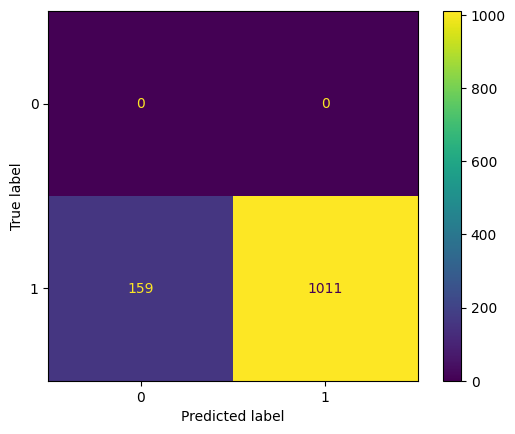

In [35]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()